<a href="https://colab.research.google.com/github/kanakpriyatiwari/Netflix-And-TV-Show-Clustering/blob/main/Netflix_And_TV_Show_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -**   **Netflix And TV Show Clustering**



---






# **Project type -** **Unsupervised Clustering and Recommendation System**


# **Contribution - Individual**

# **Name -** **Kanak Priya Tiwari**


# **Problem Statement** - 



---
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.


**Our Goal**

---


By creating clusters, we will be able to comprehend the shows that are alike and different from one another. These clusters can be used to provide customers with individualized show recommendations based on their preferences.

This project aims to classify and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are different.


# **In this project, you are required to do**

**Exploratory Data Analysis**

**Understanding what type content is available in different countries**

**Is Netflix has increasingly focusing on TV rather than movies in recent years.**

**Clustering similar content by matching text-based features**

# **Attribute Information**

1.show_id : Unique ID for every Movie / Tv Show

2.type : Identifier - A Movie or TV Show

3.title : Title of the Movie / Tv Show

4.director : Director of the Movie

5.cast : Actors involved in the movie / show

6.country : Country where the movie / show was produced

7.date_added : Date it was added on Netflix

8.release_year : Actual Releaseyear of the movie / show

9.rating : TV Rating of the movie / show

10.duration : Total Duration - in minutes or number of seasons

11.listed_in : Genere

12.description: The Summary description

# **GitHub Link -**


## ***Let's Begin !***

## **Importing Required libraries**

---



In [79]:
# import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**loading the dataset**

In [80]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [81]:
# LOADING DATASET 
Netflix_df = pd.read_csv("/content/sample_data/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [82]:
# LET'S SEE TOP 5 ROWS 
Netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [83]:
# LET'S SEE BOTTOM 5 ROWS 
Netflix_df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


**Dataset Rows & Columns Count**

In [84]:
Netflix_df.shape

(7787, 12)

In [85]:
print("Number of Rows = ",  Netflix_df.shape[0],  "\nNumber of Columns = ", Netflix_df.shape[1])

Number of Rows =  7787 
Number of Columns =  12


In [86]:
# COLUMN NAMES 
Netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information

In [87]:
# Dataset Info
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Duplicate Values**


 We can save time and money by not sending the same data to the machine learning model multiple times by removing duplicate data from our set.

In [88]:
# LET'S SEE DUPLICATE VALUES

duplicate = Netflix_df.duplicated().sum()
print("The  number of duplicate values is  : ",duplicate)

The  number of duplicate values is  :  0


We found that there were no duplicate entries in the above data.

###  Statistical Summary

In [89]:
# Dataset Describe    (used to get statistics of numerical columns)
Netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


# **Unique Values**

In [90]:
# Check Unique Values for each variable.
for i in Netflix_df.columns.tolist():
  print("No. of unique values in",i,"=",Netflix_df[i].nunique())


No. of unique values in show_id = 7787
No. of unique values in type = 2
No. of unique values in title = 7787
No. of unique values in director = 4049
No. of unique values in cast = 6831
No. of unique values in country = 681
No. of unique values in date_added = 1565
No. of unique values in release_year = 73
No. of unique values in rating = 14
No. of unique values in duration = 216
No. of unique values in listed_in = 492
No. of unique values in description = 7769


**Observations:**

We are focusing on several key columns of our dataset, including 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.

By utilizing these features, we plan to create a cluster column and implement both K-means and Hierarchical clustering algorithms.

Additionally, we will be developing a content-based recommendation system that utilizes the information from these columns to provide personalized suggestions to users.

 This approach will allow us to gain valuable insights and group similar data points together, as well as provide personalized recommendations based on user preferences and viewing history.

## **EDA**

---



**colunm-type**

In [91]:
Netflix_df["type"].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [92]:
Netflix_df["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

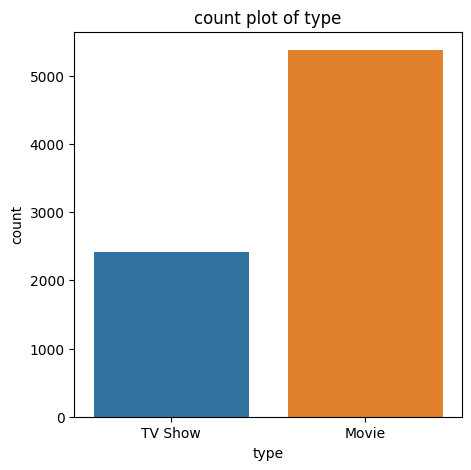

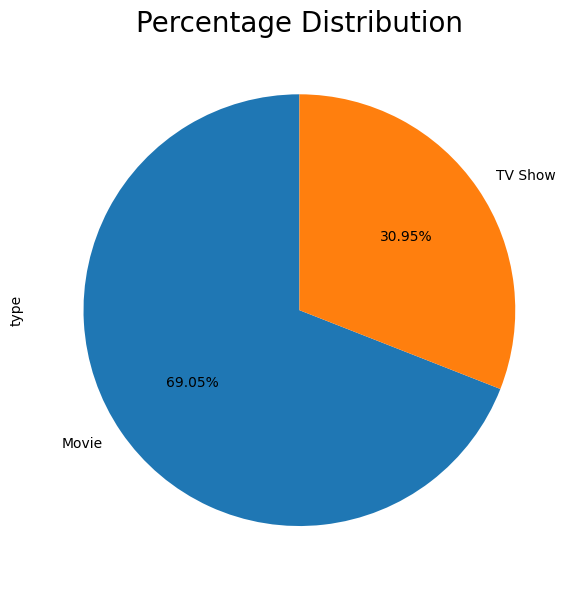

In [93]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=Netflix_df,x='type',ax=ax,capsize=0.2)
ax.set(title='count plot of type')

# piechart
fig,ax=plt.subplots(figsize=(5,5))
Netflix_df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()


**Observations:**

Movies has more number of counts than TV Shows.
31% of the data are from TV shows, while 69% of the data are from movies.

**Column: 'title'**

In [94]:
# number of unique values
Netflix_df['title'].nunique()

7787

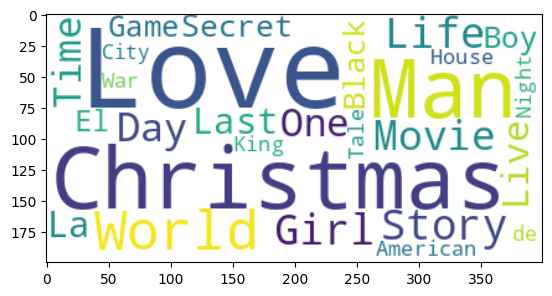

In [95]:
# text documents
text = " ".join(word for word in Netflix_df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

Observation:

Words like 'Love', 'Christmas', 'Man', 'World', 'Life', 'Girl', and 'Story' are frequently used in the movie title column.

 **Column: 'director'**

In [96]:
unique_director = Netflix_df.director.nunique()
print("The no. of unique value director is :",unique_director)

null_value_director = Netflix_df.director.isna().sum()
print("The no. of null values in director is :",null_value_director)

The no. of unique value director is : 4049
The no. of null values in director is : 2389


In [97]:
print(f"Number of Movies directed by directors are :{Netflix_df[Netflix_df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"Number of TV shows directed by directors are : {Netflix_df[Netflix_df['type']=='Movie']['director'].value_counts().sum()}")

Number of Movies directed by directors are :184
Number of TV shows directed by directors are : 5214


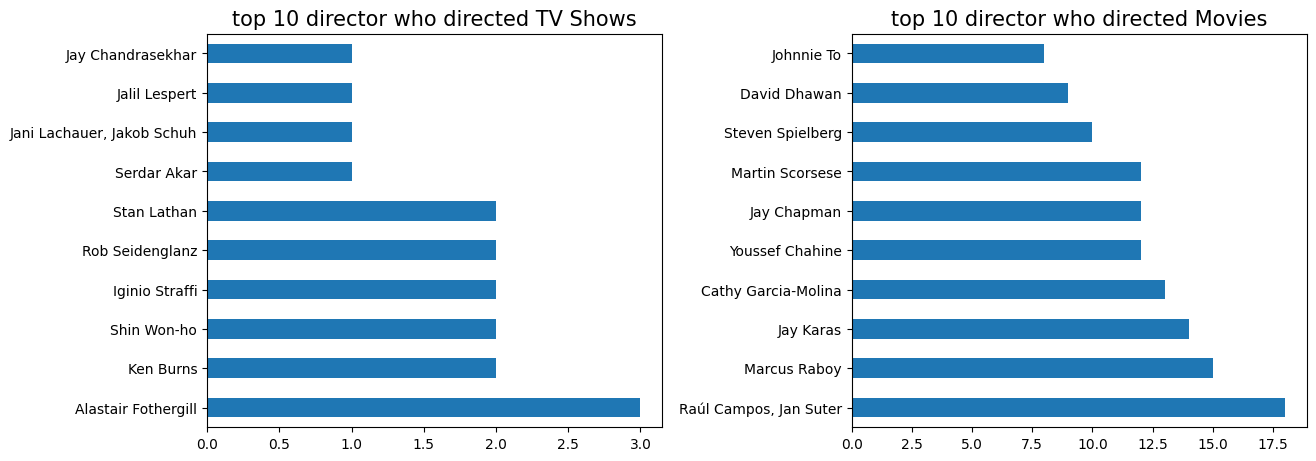

In [98]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 directors who directed TV shows
tv_shows = Netflix_df[Netflix_df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows', size=15)

# top 10 directors who directed Movies
movies = Netflix_df[Netflix_df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

**Observations:**

**The three shows directed by Alastair Fothergill are the highest on the data list.**
**Both, Jan Suter and Raul Campos have directed 18 films, more than anyone else in the dataset.**

**Column: 'cast'**

In [99]:
Netflix_df["cast"]

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: object

In [100]:
cast = Netflix_df["cast"].str.split(',',expand = True).stack()
# top actors name who play highest role in movie/show.
cast.value_counts()

 Anupam Kher          38
 Takahiro Sakurai     28
 Om Puri              27
Shah Rukh Khan        27
 Boman Irani          25
                      ..
 Juan Manuel Diaz      1
 Ana Wills             1
 Mauricio Figueroa     1
 Matias Maldonado      1
 Rachel Khoo           1
Length: 35372, dtype: int64

In [101]:
print(f"Number of TV Shows actors: {len(Netflix_df[Netflix_df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts())}")
print(f"Number of Movies actors: {len(Netflix_df[Netflix_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().value_counts())}")

Number of TV Shows actors: 13585
Number of Movies actors: 23049


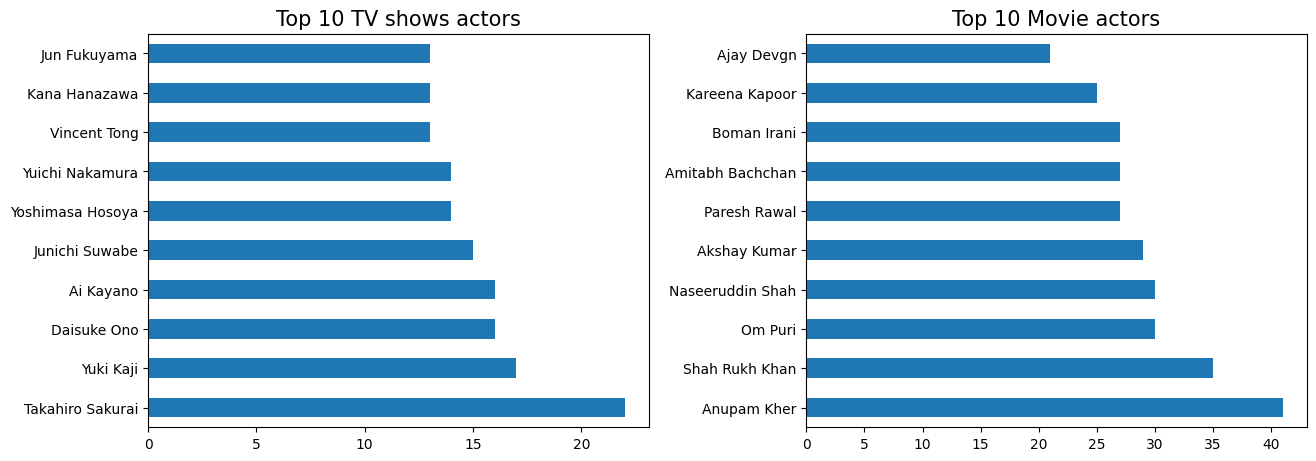

In [102]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = Netflix_df[Netflix_df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = Netflix_df[Netflix_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

**Observations:**

The majority of the roles in the movies are played by Anupam Kher, Shahrukh Khan, and Om Puri.
In the shows, Takahiro Sakurai, Yuki Kaji, and Daisuke Ono played the most number of roles.

**Column: 'country'**

In [103]:
# number of unique values
Netflix_df['country'].nunique()

681

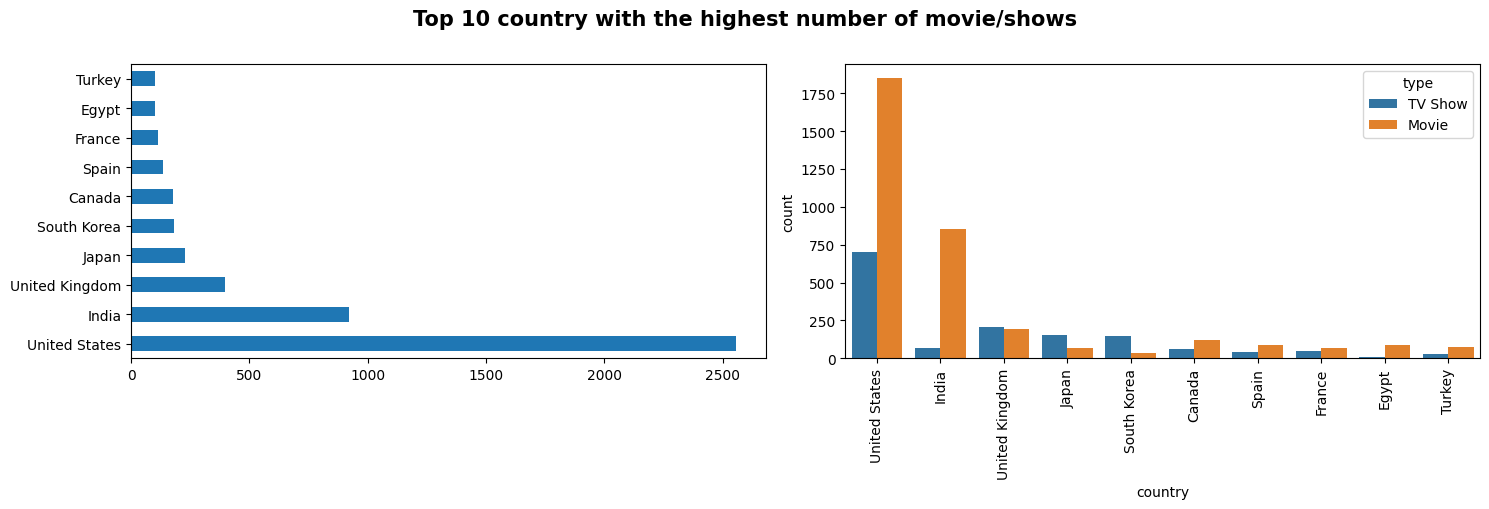

In [104]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
Netflix_df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="country", data=Netflix_df, hue='type', order=Netflix_df['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:**

The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.
In India and United State, a greater number of movies are present compared to TV shows.
In the UK, Japan, and South Korea there are a greater number of TV shows than movies.

**Column: 'release_year'**

In [105]:
# number of unique values
Netflix_df['release_year'].nunique()

73

In [106]:
print(f'Oldest release year : {Netflix_df.release_year.min()}')
print(f'Latest release year : {Netflix_df.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


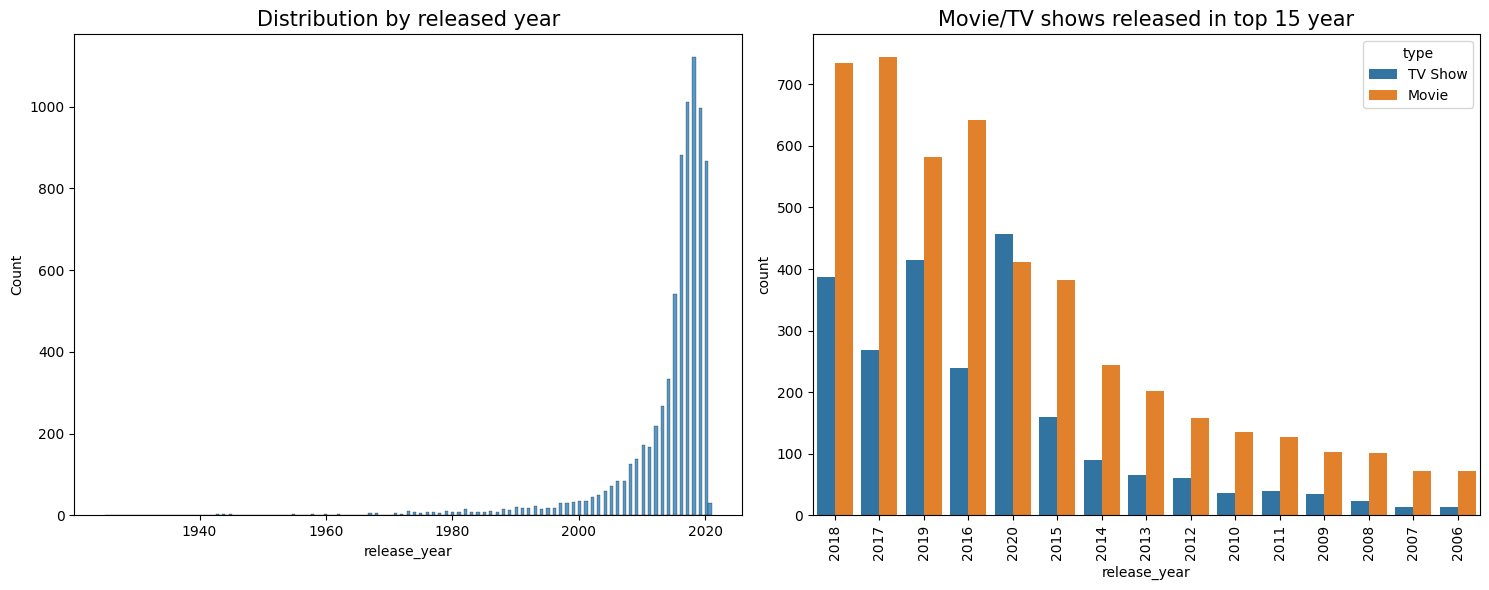

In [107]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(Netflix_df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=Netflix_df, order=Netflix_df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observations:**

Netflix starts releasing more Movies/TV shows in recent years compared to old ones.
Most Movies and TV shows are available on Netflix between 2015 and 2020, and the highest are in 2018.

**Column: 'rating'**

In [108]:
# number of unique values
Netflix_df.rating.nunique()

14

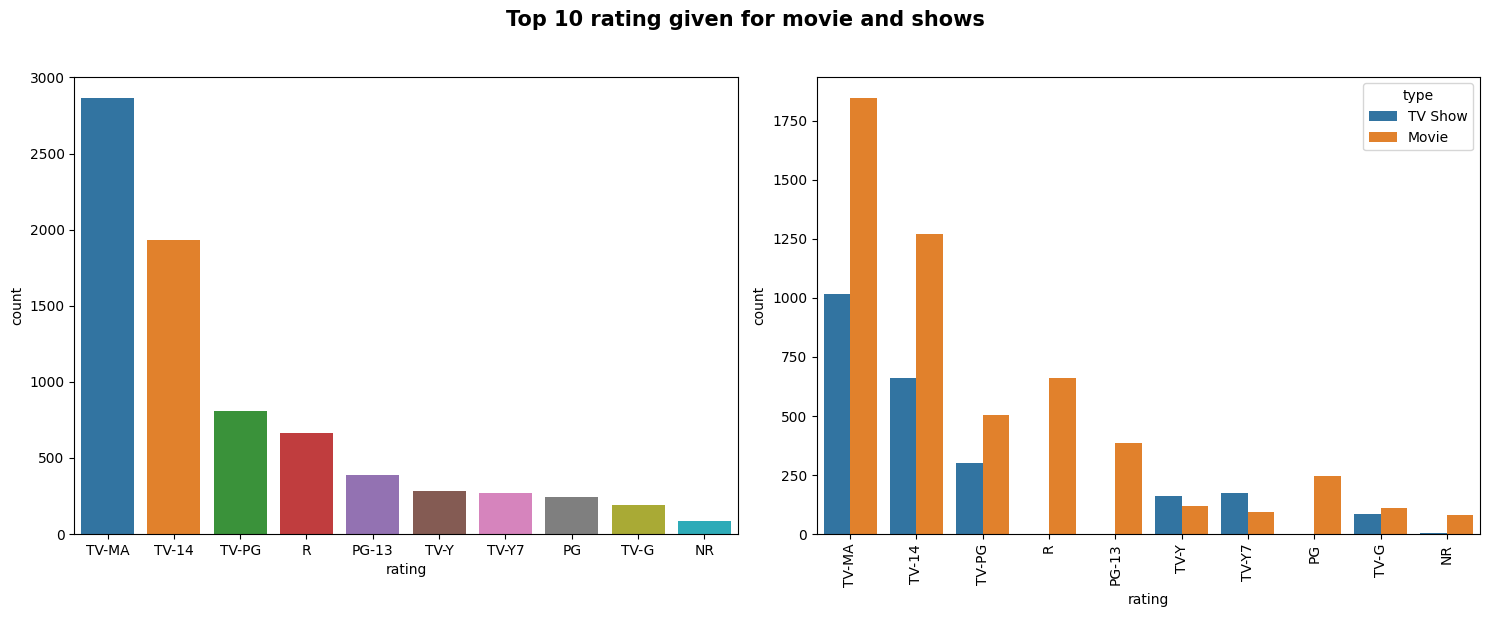

In [109]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=Netflix_df, order=Netflix_df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=Netflix_df, hue='type', order=Netflix_df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observations:**

The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience."
When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.

**Column: 'listed_in'**

In [110]:
Netflix_df['listed_in'].head()

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
Name: listed_in, dtype: object

Because this column is a genre column, in order to count the genres, we must separate them.

In [111]:
# seperating genre from listed_in columns for analysis purpose
genres = Netflix_df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

,genre,count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1199
4,Documentaries,786


In [112]:
# number of genres present in dataset 
len(genres)

42

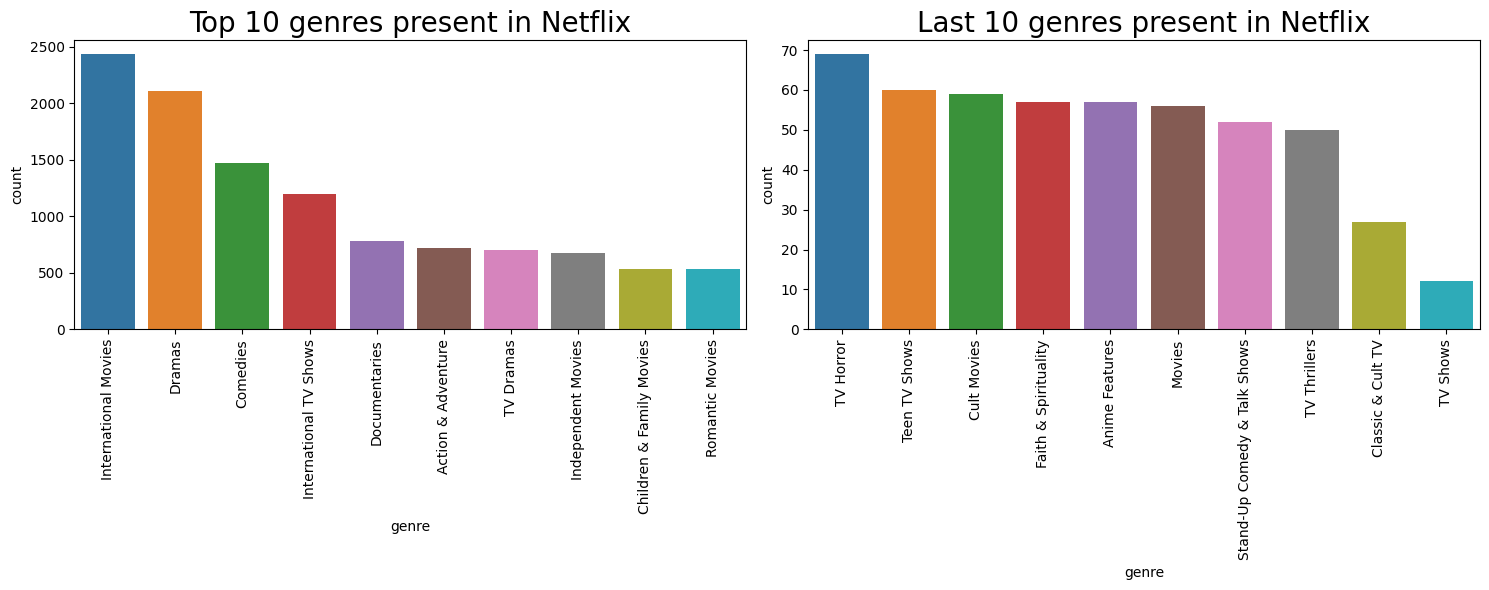

In [113]:
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count', data=genres[:10], ax=ax[0])
top.set_title('Top 10 genres present in Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)

# Last 10 genres
bottom = sns.barplot(x='genre', y = 'count', data=genres[-10:], ax=ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observations:**

International Movies, Dramas, and Comedies make up the majority of the genres.
TV Shows, Classic and cult TV, TV thrillers, Stand-Up comedy, and Talk shows account for the least genres.

**Column: 'description'**

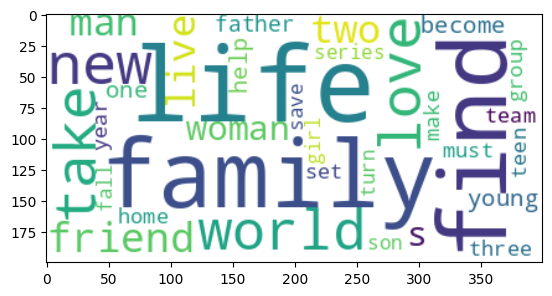

In [114]:
# text documents
text = " ".join(word for word in Netflix_df['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

**Observation:**

The most frequently used words in the description column are "family," "find," "life," "love," "new world," and "friend."

**Missing Values/Null Values**


There are frequently a lot of missing values in the actual data. Corrupted or missing data may result in missing values. Since many machine-learning algorithms do not support missing values, missing data must be handled during the dataset's pre-processing. Therefore, we begin by looking for values that are missing.

In [115]:
null_values = Netflix_df.isnull().sum()
print(" The null values in our dataset is :", null_values)

 The null values in our dataset is : show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


**Handling Missing Values**
* The "empty string" can be used to replace the missing values in the director, cast, and country attributes. 
* There is a small percentage of null values in the rating and date_added columns; eliminating these nan values will have little effect on the model's construction. As a result, the nan value in the rating and date_added columns is simply removed.

In [116]:
# Handling Missing Values & Missing Value Imputation
Netflix_df[['director','cast','country']] = Netflix_df[['director','cast','country']].fillna('')
Netflix_df.dropna(axis=0, inplace=True)

In [117]:
# Let's check 
Netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### **Handling Outliers**

<Axes: >

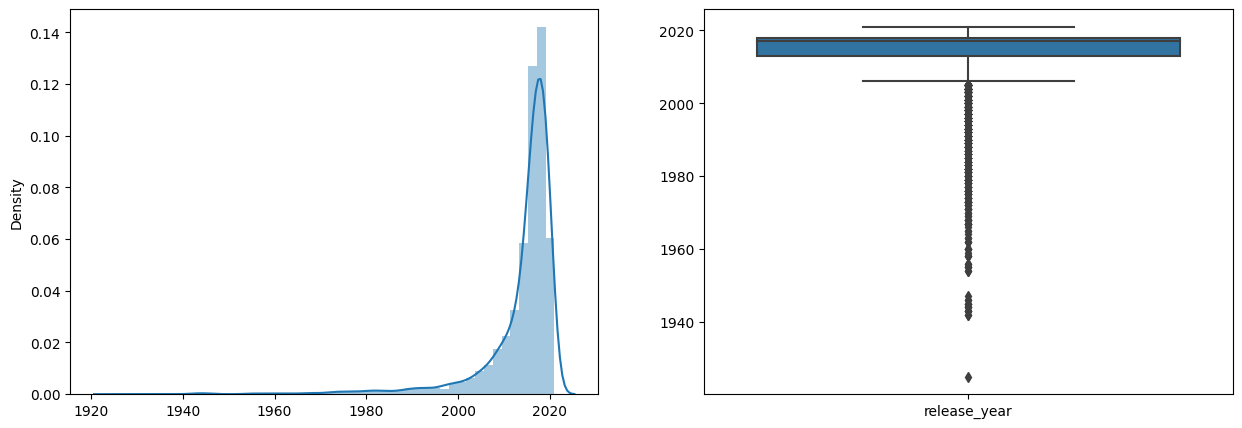

In [118]:
# Handling Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=Netflix_df['release_year'], ax=ax[0])
sns.boxplot(data=Netflix_df, ax=ax[1])


**Handling Outliers**
* Except for the release year, almost all of the data are presented in text format.
* The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

# **Textual Data Preprocessing**

---
Textual data preprocessing is an essential step in natural language processing (NLP) and machine learning tasks involving text. It involves transforming raw text data into a format suitable for analysis or modeling. Here are some common techniques used in textual data preprocessing:

---

**Tokenization:** Tokenization is the process of splitting the text into smaller units, called tokens. Tokens can be words, sentences, or even characters. This step is typically performed to break down the text and enable further analysis.


**Lowercasing:** Converting all text to lowercase can help standardize the data and treat words with the same spelling but different cases as identical. It prevents the model from considering the same word as different tokens based on their case.


**Stopword Removal:** Stopwords are common words that do not carry much meaning, such as "and," "the," or "is." Removing these words from the text can reduce the size of the data and eliminate noise that may interfere with the analysis or modeling process.


**Punctuation Removal:** Removing punctuation marks like commas, periods, or question marks can simplify the text and avoid unnecessary variations of the same word due to punctuation differences.


**Lemmatization/Stemming:** Lemmatization and stemming are techniques used to reduce words to their base or root form. Lemmatization aims to convert words to their dictionary form (lemma), while stemming cuts off prefixes or suffixes to obtain the base form. These techniques can help consolidate related words and reduce vocabulary size.


#### **Modeling Approach**
1.   Choose the attributes that you want to cluster. 
2.   **Text Preprocessing:** Change all textual data to lowercase and eliminate all punctuation marks and stopwords. Removing commonly occurring words such as "the", "and", "a", etc. that don't carry much meaning.
3.   **Stemming or Lemmatization:** Normalizing the words by reducing them to their base form.
4.   **Tokenization:** Breaking the text into smaller units, such as sentences or words.
5.   **Dimensionality reduction.**
6.   Make use of various algorithms to cluster the movies and various techniques to determine the optimal number of clusters.
7.   Build the optimal number of clusters and use wordclouds to display the contents of each cluster.

### **6.1 Selecting Attributes**

In [119]:
Netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


We will cluster the Netflix movies and TV shows into groups based on the following textual characteristics:
* Director
* Cast
* Country
* Rating
* Listed in (genres)
* Description

In [120]:
# CONCATENATING MULTIPLE COLUMNS WHICH IS CONTAINIG INFORMATION ABOUT (directors, cast, country, rating, listed_in, and description)
Netflix_df['TEXT_data'] = Netflix_df['director'] + Netflix_df['cast'] + Netflix_df['country'] + \
                     Netflix_df['rating'] + Netflix_df['listed_in'] + Netflix_df['description']
     

In [121]:
# LETS SEE TEXT_data 
Netflix_df["TEXT_data"][0]

'João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

### **6.2 Removing Stop words and Lower Casing.**

**Lowercasing:**
 Converting all text to lowercase can help standardize the data and treat words with the same spelling but different cases as identical. It prevents the model from considering the same word as different tokens based on their case.


**Stopword Removal:** Stopwords are common words that do not carry much meaning, such as "and," "the," or "is." Removing these words from the text can reduce the size of the data and eliminate noise that may interfere with the analysis or modeling process.



In [122]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
np.array(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [123]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)
     

In [124]:
# applying stopwords function. 
Netflix_df['TEXT_data'] = Netflix_df['TEXT_data'].apply(stopwords)

In [125]:
# checking the first row again
Netflix_df['TEXT_data'][0]

'joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschibraziltv-mainternational tv shows, tv dramas, tv sci-fi & fantasyin future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.'

* We have successfully changed the corpus to lowercase and removed all stopwords.

**Removing Punctuations**

---



Removing punctuation is the process of removing any punctuation marks (e.g., periods, commas, exclamation points, etc.) from text data. This is a common pre-processing step in natural language processing (NLP) tasks and text analysis, as punctuation marks often do not carry much meaning and can add noise to the data. Removing punctuation can also make it easier to tokenize text into words or sentences, as punctuation marks often act as delimiters between words or sentences. Additionally, removing punctuation can also help in reducing the size of the vocabulary, which can make it easier to work with larger texts or texts in languages with a high number of inflected forms. It can be done using python libraries such as string, re, and nltk.

In [126]:
import string

def remove_punctuation(text):
    # Create a translation table to remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    
    # Apply the translation table to remove punctuation
    text_without_punct = text.translate(translator)
    
    return text_without_punct

In [127]:
# applying remove_punctuation function
Netflix_df['TEXT_data'] = Netflix_df['TEXT_data'].apply(remove_punctuation)

In [128]:
# checking the first row after the process
Netflix_df['TEXT_data'][0]

'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi  fantasyin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

* We have effectively eliminate all the punctuation marks from the corpus.